Import basic Libraries
- **pandas** for data manipulation and analysis
- **numpy** to perform a number of mathematical operations on arrays, multidimensional matrix such as trigonometric, statistical, and algebraic
- **matplotlib** for graphical representation 
- **yfinance** to access real stock data  

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

import yfinance as yf
EON_Real = yf.download("EONGY", start="2018-12-31", end="2019-12-31")
RWE_Real = yf.download("RWE.DE", start="2018-12-31", end="2019-12-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Exploratory Data Analysis
- check overall data structure

In [2]:
print(EON_Real.info(), "\n\n")
print(EON_Real.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-12-31 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB
None 


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-12-31 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB
None

## TASK 1 

- plotting E.ON SE closing rate from date 2018-12-31 to 2019-12-31

<ipython-input-3-630252aa4e8b>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


[Text(0, 0.5, 'Rate'), Text(0.5, 0, 'Time'), Text(0.5, 1.0, 'E.ON SE')]

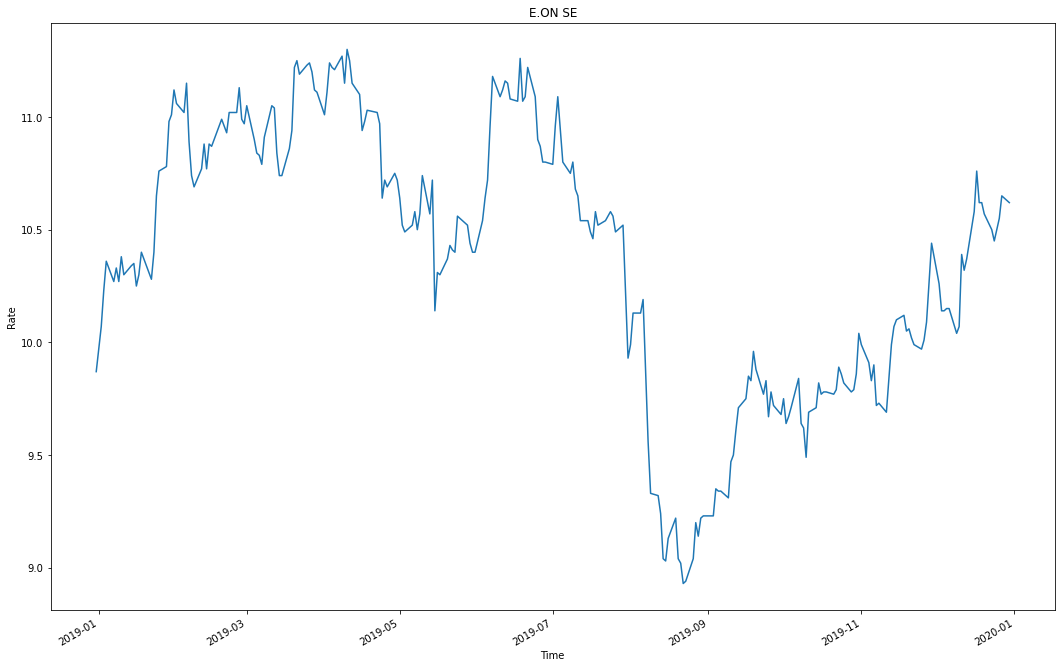

In [3]:
import matplotlib.pyplot as plt
EON_Real["Close"].plot(figsize= (18,12))
ax = plt.axes()
ax.set(xlabel='Time', 
       ylabel='Rate', title = "E.ON SE")

- plotting RWE AG closing rate from date 2018-12-31 to 2019-12-31

<ipython-input-4-9945ac683647>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


[Text(0, 0.5, 'Rate'), Text(0.5, 0, 'Time'), Text(0.5, 1.0, 'RWE AG')]

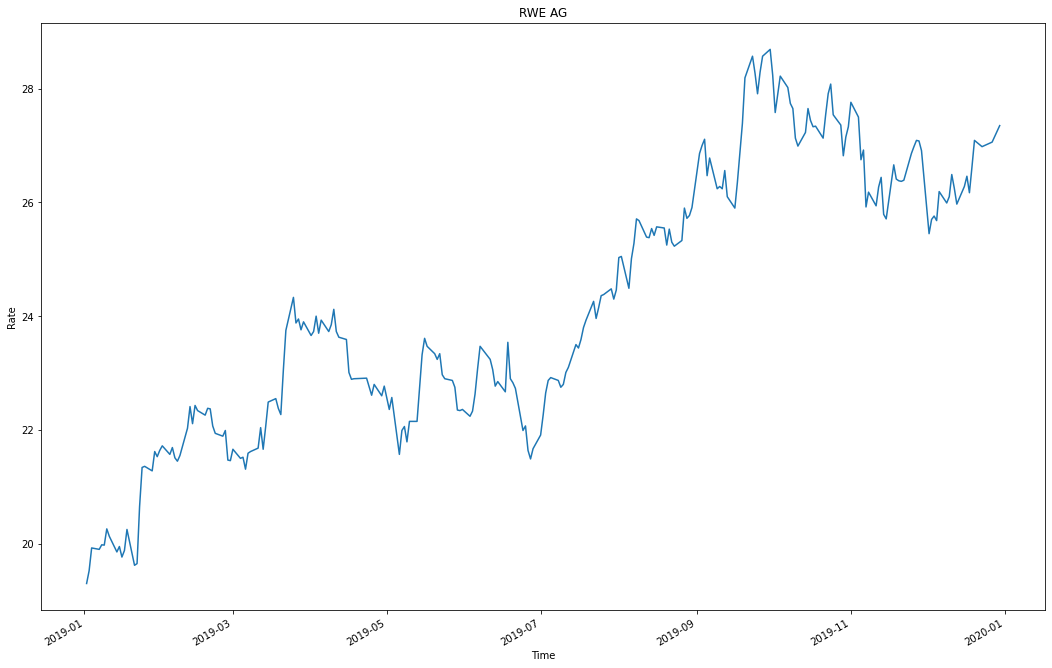

In [4]:
RWE_Real["Close"].plot(figsize= (18,12))
ax = plt.axes()
ax.set(xlabel='Time', 
       ylabel='Rate', title = "RWE AG")

- import predictions and check NA values

In [5]:
wattsight_results = pd.read_csv("C:/Users/patil/Desktop/model_results.csv", index_col= 0, parse_dates=['Date'])
wattsight_results.info()
wattsight_results.isna().any()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2018-12-31 to 2019-12-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model_eon  253 non-null    float64
 1   model_rwe  251 non-null    float64
dtypes: float64(2)
memory usage: 6.1 KB


model_eon    True
model_rwe    True
dtype: bool

- rectify the data

In [6]:
model_eon = wattsight_results.copy()
model_eon.drop(["model_rwe"], axis = 1, inplace = True) 
model_eon.dropna(axis =0, inplace=True )
model_eon.isna().sum()

model_eon    0
dtype: int64

In [7]:
model_rwe = wattsight_results.copy()
model_rwe.drop(["model_eon"], axis = 1, inplace = True) 
model_rwe.dropna(axis =0, inplace=True )
model_rwe.isna().sum()

model_rwe    0
dtype: int64

## Task 2 & 3

- plotting E.ON SE closing rate Vs Predicted closing rate

<ipython-input-8-35fdedad43ff>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


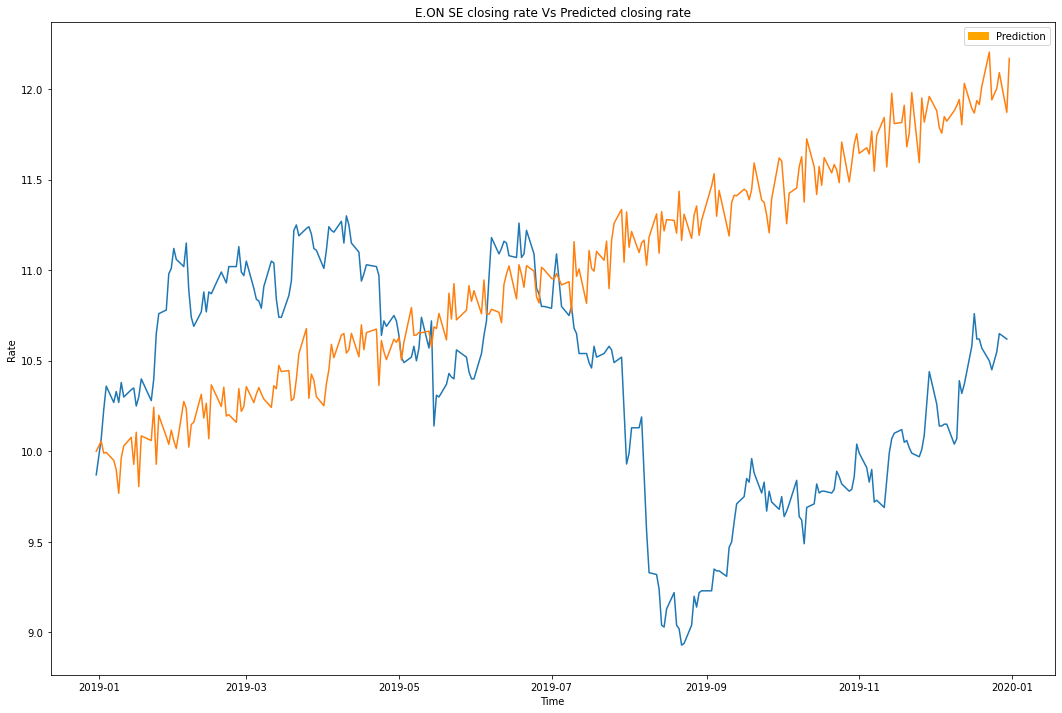

In [8]:
import matplotlib.patches as mpatches
plt.figure(figsize=(18,12))
plt.plot(EON_Real["Close"])
plt.plot(model_eon)
red_patch = mpatches.Patch(color='orange', label='Prediction')
plt.legend(handles=[red_patch])
ax = plt.axes()
ax.set(xlabel='Time', 
       ylabel='Rate', title = "E.ON SE closing rate Vs Predicted closing rate")
plt.show()

- Error Matrix caluculations

In [9]:
import math
from sklearn.metrics import mean_squared_error
model_eon =  model_eon [:-1]
rmse = math.sqrt(mean_squared_error(EON_Real["Close"],model_eon))
print("RMSE= "+ str(rmse))

RMSE= 1.213547369896841


In [10]:
from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(EON_Real["Close"],model_eon)
print("MAE= "+ str(mae))

MAE= 0.991807831749498


In [11]:
from sklearn.metrics import r2_score
r2 = r2_score(RWE_Real["Close"],model_rwe)
print("R^2= "+ str(r2))

R^2= -2.318101011170785


- plotting RWE AG closing rate Vs Predicted closing rate

<ipython-input-12-e7b8e30520bc>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


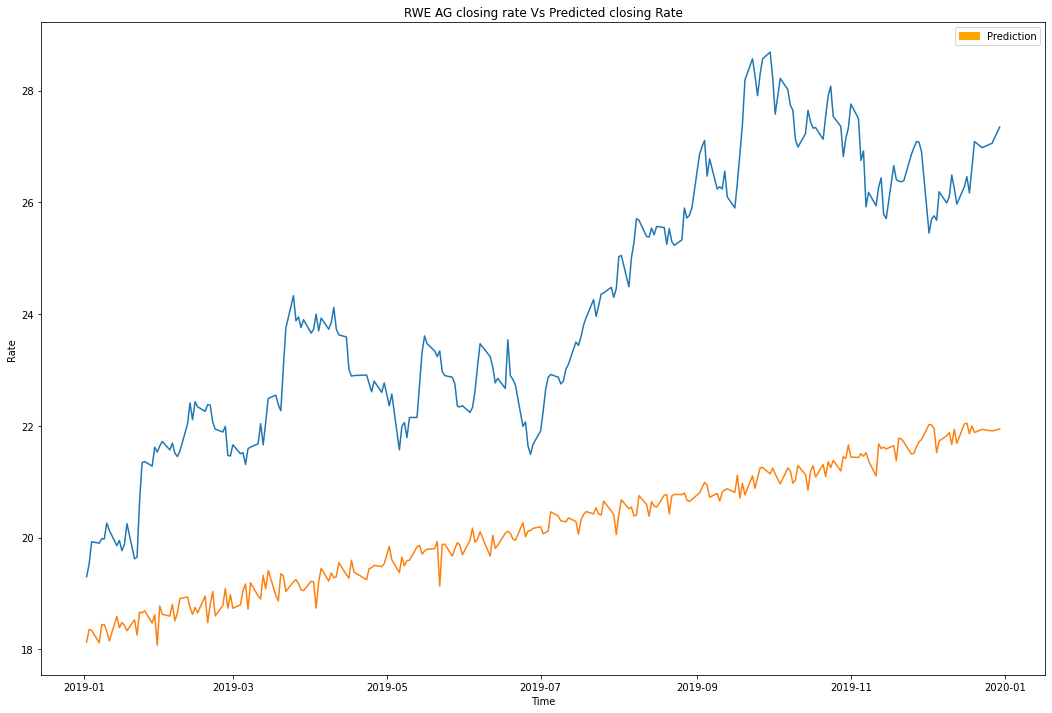

In [12]:
plt.figure(figsize=(18,12))
plt.plot(RWE_Real["Close"])
plt.plot(model_rwe)
red_patch = mpatches.Patch(color='orange', label='Prediction')
plt.legend(handles=[red_patch])
ax = plt.axes()
ax.set(xlabel='Time', 
       ylabel='Rate', title = "RWE AG closing rate Vs Predicted closing Rate")
plt.show()

- Error Matrix caluculations

In [13]:
RMSE = math.sqrt(mean_squared_error(RWE_Real["Close"],model_rwe))
print("RMSE= "+ str(RMSE))

RMSE= 4.270701258750857


In [14]:
MAE= mean_absolute_error(RWE_Real["Close"],model_rwe)
print("MAE= "+ str(MAE))

MAE= 4.0024822025812625


In [15]:
R2 = r2_score(RWE_Real["Close"],model_rwe)
print("R^2= "+ str(R2))

R^2= -2.318101011170785


##  Task4; Observations and Answers

- By theory, model predicted results for E.ON SE good as RMSE and MAE are showing less erros while predicting. But neither of the results are satisfactory; negative R^2 score.
<br><br>
- Model tends to show good results in Linear case as for both the stocks, linearity can be seen. Furthermore, if one would have relied on the model prediction for real investments; contrary at the end of the year he would have got more returns in RWE AG.
<br><br>
- Looking back in 2019, I would say RWE AG performed better in the stock exchange; considering long term investment. In multiple trades, E.ON could give good returns.
<br><br>
- If I want to create a model that predicts the closing price for a stock for the same day, It should give better results than linear regression model.R2 and RMSE over certain period as well as visual analytics would be my choice for validation. 